**面向对象的继承**
比较官方的说法就是：

继承（英语：inheritance）是面向对象软件技术当中的一个概念。如果一个类别B“继承自”另一个类别A，

就把这个B称为“A的子类别”，而把A称为“B的父类别”也可以称“A是B的超类”。

**继承的好处：**

继承可以使得子类别具有父类别的各种属性和方法，而不需要再次编写相同的代码。

在令子类别继承父类别的同时，可以重新定义某些属性，并重写某些方法，

即覆盖父类别的原有属性和方法，使其获得与父类别不同的功能。

一般静态的面向对象编程语言，继承属于静态的，意即在子类别的行为在编译期就已经决定，无法在执行期扩充。


**继承与抽象**（先抽象再继承）
抽象即抽取类似或者说比较像的部分。

抽象分成两个层次：

1. 将上官丹丹和欧阳丹丹这俩对象比较像的部分抽取成类；

2. 将人，猪，狗这三个类比较像的部分抽取成父类。

抽象最主要的作用是划分类别（可以隔离关注点，降低复杂度）

继承：是基于抽象的结果，通过编程语言去实现它，肯定是先经历抽象这个过程，才能通过继承的方式去表达出抽象的结构。

# 继承的基本语法

In [6]:
class Animal:
  def __init__(self,name,age,sex):
    self.name = name
    self.age = age
    self.sex = sex


class People(Animal): #人这个类继承自Animal类，类定义时候的括号就是用来继承的
  def walk(self):
    print('People {} is walking'.format(self.name))


class Pig(Animal):
  def eat(self):
    print('Pig {} is eating'.format(self.name))


class Dog(Animal):
  def bark(self):
    print('Dog {} is barking'.format(self.name))


person = People('张三',3,'male') #参数还是传给初始化函数__init__
pig = Pig('猪猪侠',2,'母')
dog = Dog('哮天犬',6,'公')

print(person.name) #父类的属性，子类也具备，因此在实例化的时候能够传进去
person.walk()
pig.eat()
dog.bark()




张三
People 张三 is walking
Pig 猪猪侠 is eating
Dog 哮天犬 is barking


**继承的优点**也是显而易见的：

1. 增加了类的耦合性。

2. 减少了重复代码。

3. 使得代码更加规范化，合理化。

就向上面的例子：

Aminal 叫做父类,基类,超类。

Person Pig Dog: 子类，派生类。

继承：可以分单继承，多继承。

# 继承父类的方法&重构

In [8]:
class Animal:
  def __init__(self,name,age,sex):
    self.name = name
    self.age = age
    self.sex = sex
  
  def eat(self): #在父类里写一个eat方法
    print('{} is eating'.format(self.name))
    

class People(Animal):
  def walk(self):
    print('People {} is walking'.format(self.name))


class Pig(Animal):
  def eat(self): #对父类方法进行了重构
    print('猪在胡吃海喝。。。')


person = People('张三',3,'male')
pig = Pig('猪猪侠',2,'母')

person.walk()
person.eat()  #继承自父类的eat方法
pig.eat()  #在子类中重构的eat方法


People 张三 is walking
张三 is eating
Pig 猪猪侠 is eating


# 不完全重构

既执行父类的方法，又执行子类重构的方法：**不完全重构**

## 方法一：

`父类名.func(参数)`

直接调，然后把子类新加的写下面

In [11]:
class Animal:
  def __init__(self,name,age,sex):
    self.name = name
    self.age = age
    self.sex = sex
  
  def eat(self):
    print('{} is eating'.format(self.name))
    

class Pig(Animal):
  def eat(self): #不完全重构
    Animal.eat(self) #直接调用父类中的方法，把自己传进去
    print('猪在胡吃海喝。。。') #子类方法中新加的内容


pig = Pig('猪猪侠',2,'母')


pig.eat() 

猪猪侠 is eating
猪在胡吃海喝。。。


In [7]:
# 初始化方法/构造方法 的重构也是一样的；实际上初始化方法和普通方法一样，只不过在实例化的时候自动执行
class Animal:
  def __init__(self,name,age,sex):
    self.name = name
    self.age = age
    self.sex = sex
  
  def eat(self):
    print('{} is eating'.format(self.name))


class People(Animal):
  def __init__(self,hobby): #完全重构
    self.hobby = hobby


person = People('b-ball') #这里只传进去self和hobby两个参数就可以了
print(person.hobby)
# person.eat() #会报错，虽然继承了，但是因为person没有name这个属性了，而父类的eat方法里面调用了name属性

b-ball


In [8]:
# 初始化方法/构造方法 的重构也是一样的；初始化方法和普通方法一样，只不过在实例化的时候自动执行
class Animal:
  def __init__(self,name,age,sex):
    self.name = name
    self.age = age
    self.sex = sex
  
  def eat(self):
    print('{} is eating'.format(self.name))

class People(Animal):
  def __init__(self,name,age,sex,hobby):
    Animal.__init__(self,name,age,sex) #不完全重构，调用父类的方法完成部分属性的赋值
    self.hobby = hobby

person = People('张三','3','male','b-ball')

print(person.name)
print(person.hobby)
person.eat()

张三
b-ball
张三 is eating


## 方法二：super()语法

python3基本都这么用

`super(子类名，self).func(除去self外的参数)`

与 父类名.func(参数) 效果一样

//super(子类)就是超类、父类的意思

可以简写为

`super().func(除去self外的参数)`

个人理解这个方法的好处，super(自己)，自动找到哪一个是我的父类，不容易产生歧义；
简写方法更加简介；


In [2]:
class Animal:
  def __init__(self,name,age,sex):
    self.name = name
    self.age = age
    self.sex = sex
  
  def eat(self):
    print('{} is eating'.format(self.name))
    

class Pig(Animal):
  def eat(self): #不完全重构
    # Animal.eat(self) #直接调用父类中的方法，把自己传进去
    # super(Pig,self).eat() #super方法
    super().eat()
    print('猪在胡吃海喝。。。')


pig = Pig('猪猪侠',2,'母')


pig.eat() 

猪猪侠 is eating
猪在胡吃海喝。。。


In [3]:
# 初始化方法/构造方法 的重构也是一样的；初始化方法和普通方法一样，只不过在实例化的时候自动执行
class Animal:
  def __init__(self,name,age,sex):
    self.name = name
    self.age = age
    self.sex = sex
  
  def eat(self):
    print('{} is eating'.format(self.name))

class People(Animal):
  def __init__(self,name,age,sex,hobby):
    # Animal.__init__(self,name,age,sex) #不完全重构，调用父类的方法完成部分属性的赋值
    # super(People,self).__init__(name,age,sex)
    super().__init__(name,age,sex)
    self.hobby = hobby

person = People('张三','3','male','b-ball')

print(person.name)
print(person.hobby)
person.eat()

张三
b-ball
张三 is eating


## 多继承

允许继承多个类

并不是所有的语言都支持多继承，python\c++是支持的，Java不支持

In [4]:
class Shenxian:
  '''神仙类'''
  def fly(self):
    print('神仙都会飞。。。')


class Monkey:
  '''猴子类'''
  def eat_peach(self):
    print('猴子都爱吃桃子。。。')


class MonkeyKing(Shenxian,Monkey): #继承了两个父类里面的方法

  def play_gold_stick(self):
    print('孙悟空玩金箍棒。。。')


swk = MonkeyKing()
swk.fly()
swk.eat_peach()
swk.play_gold_stick()

神仙都会飞。。。
猴子都爱吃桃子。。。
孙悟空玩金箍棒。。。


继承的两个父类里面有相同名字的方法

In [7]:
class Shenxian:
  '''神仙类'''
  def fly(self):
    print('神仙都会飞。。。')
  
  def fight(self):
    print('神仙在打架。。。')


class Monkey:
  '''猴子类'''
  def eat_peach(self):
    print('猴子都爱吃桃子。。。')

  def fight(self):
    print('猴子在打架。。。')


class MonkeyKing(Shenxian,Monkey): #左右两个父类有相同的方法，继承左边那个的
  def play_gold_stick(self):
    print('孙悟空玩金箍棒。。。')



swk = MonkeyKing()
swk.fight()

神仙在打架。。。


# 补充：object关键字

In [ ]:
### 补充一个知识点，object关键字
'''
  在python3中下面两种写法是一个意思，实际上所有的类都继承于最原始的类object，
  但是在python3中默认可以省略掉，不过一般也还可以写上
  一切皆对象，定义的类也可以理解为一种对象：类对象
'''

class Student:
  def do_homework():
    print('a student is doing home work...')

class Student(object):
  def do_homework():
    print('a student is doing home work...')

# 了解：C3算法

多继承中方法的查找路径，不用细看，知道有这个东西就行

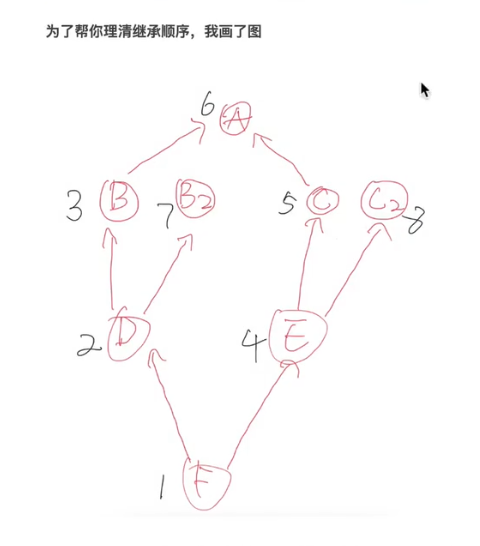

In [10]:
class A:
  def test(self):
    print('from A')


class B(A):
  # def test(self):
  #   print('from B')
  pass

class B2:
  def test(self):
    print('from B2')


class C(A):
  def test(self):
    print('from C')


class C2:
  def test(self):
    print('from C2')


class D(B,B2):
  # def test(self):
  #   print('from D')
  pass


class E(C,C2):
  def test(self):
    print('from E')


class F(D,E):
  # def test(self):
  #   print('from F')
  pass

# 不知道C3算法原理，怎么知道查找顺序呢？
# 使用下面简答的一个方法
print(F.mro())

f1 = F()
f1.test()

[<class '__main__.F'>, <class '__main__.D'>, <class '__main__.B'>, <class '__main__.E'>, <class '__main__.C'>, <class '__main__.A'>, <class '__main__.B2'>, <class '__main__.C2'>, <class 'object'>]
from E


# 补充：pass关键字

In [9]:
### pass关键字的作用，保证程序结构正确
a = 1
if a == 1:
  pass    #还没想好要写什么
else:
  pass    #还没想好要写什么